![alt text](https://forger.typo3.org/images/slack.svg "subtitle")

# Cut the *Slack*!  --  An In-depth Analysis of a Chat App 

![alt text](https://cdn0.vox-cdn.com/thumbor/uEajbiHF_x2vgwHF9BDRO-_nrtw=/93x0:1266x880/1400x1050/cdn0.vox-cdn.com/uploads/chorus_image/image/49526193/reaction-examples.0.png "subtitle")


[Slack](www.slack.com) is a messaging application that supports group chatting and direct messaging. It is [reportedly killing email](http://www.theverge.com/2014/8/12/5991005/slack-is-killing-email-yes-really) because of its ease of use and growing popularity! As you can see in the picture above, on the left side of Slack, there are multiple 'channels' you can join and chat in. These are public messages, but Slack also allows Direct Messaging, which are private messages between 2+ people. On any given post, you can add your 'reaction' which are emojis, which have become *way* too prevalent in modern communication :D :P :'(    

Our [MSA Class of 2017](http://analytics.ncsu.edu/?page_id=243), 119 strong, used slack from the beginning of our journey to talk about school, plan social events, organize sporting events, and even chat about random things like playing Pokemon Go. We will find trends and patterns on what we've talked about, from the beginning of our program to Thanksgiving! 

### Table of Contents ###
> **Part 1: [Exploratory Analysis]**
 * [Crawling the Data](#Crawling the Data)
 * [Basics of Data](#Basics of Data)
 * [Explore by Time](#Explore by Time)
    * [By Month](#By Month)
    * [By Week](#By Week)
    * [Week vs Weekend](#Weekday vs Weekend)

> Part 2: [Discovering Channel Keywords](http://localhost:8888/notebooks/Portfolio/Text%20Mining%20on%20Slack%20App/)

> Part 3: [Channel Clustering]()

> Part 4: [Sentiment Analysis]()
    

## <a id="Crawling the Data"></a>Crawling the Data

Data was obtained in the form of a zip file, where there were folders for each channel, and JSON files for every day in which a chat occurred. Using <b>[data_generator.py](http://localhost:8888/notebooks/Portfolio/Text%20Mining%20on%20Slack%20App/data_generator.py)</b> and <b>[csv_writer.py](http://localhost:8888/notebooks/Portfolio/Text%20Mining%20on%20Slack%20App/csv_writer.py)</b> , I've written every line of slack chat and its associated metadata into one file "concatenated.csv". Only public messages, and no direct messages, were obtained.

## <a id="Basics of Data"></a>Basics of Data

We will see what the data looks like (what fields there are) and explore basic properties of the dataset

In [1]:
import pandas as pd
data = pd.read_csv("concatenated.csv")
data.columns

Index([u'channel', u'datetime', u'id', u'text', u'reactions',
       u'reaction_counts', u'reaction_total_count', u'reaction_type_count'],
      dtype='object')

In [35]:
data.sample(7)

,channel,datetime,id,text,reactions,reaction_counts,reaction_total_count,reaction_type_count
3650,general,2016-11-12 22:54:54.002296,U1NUU2U9E,any idea why survival analysis website still n...,NaN,NaN,NaN,NaN
2341,general,2016-08-22 14:42:32.000151,U1KRLV1CG,<http://www.eurohoops.net/featured/303324/djor...,NaN,NaN,NaN,NaN
6734,random,2016-10-08 10:44:19.000436,U1L6YQUSU,Eat all the stuff in the frig before it goes bad,NaN,NaN,NaN,NaN
3831,general,2016-11-24 07:32:08.002703,U1KRZT11T,Happy thanksgiving everyone :turkey: . We all ...,"[u'turkey', u'toboggan']","[31, 3]",34.0,2.0
1340,football_games,2016-10-06 17:47:30.000088,U1L7E8GSU,The MBTI j's are coming out!,"[u'joy', u'raising_hand']","[9, 1]",10.0,2.0
3679,general,2016-11-15 12:52:52.002397,U1KRNTXL5,It makes the sound of one hand clapping.,[u'joy'],[1],1.0,1.0
8003,sascoding,2016-08-03 20:08:57.000083,U1L8PJY4W,"Found these on Quizlet if anyone has the app, ...","[u'clap', u'+1', u'dart', u'raised_hands']","[11, 4, 1, 1]",17.0,4.0


In [39]:
data.sample(7)

,channel,datetime,id,text,reactions,reaction_counts,reaction_total_count,reaction_type_count
9571,social,2016-09-22 16:19:26.000173,U1KRE1L9M,"If anyone's looking to do something tonight, c...",NaN,NaN,NaN,NaN
9013,social,2016-07-14 12:00:58.000005,U1M1L5G6L,virgil's is downtown and it's like 4 dollars a...,NaN,NaN,NaN,NaN
3637,general,2016-11-11 09:09:04.002202,U1L4RTKCM,Happy Veteran's Day to all our military classm...,"[u'heart', u'flag-us', u'clap', u'muscle', u'm...","[30, 44, 10, 13, 8, 10]",115.0,6.0
225,aventferryandgorman,2016-10-09 18:15:37.000031,U1L6WB44A,<@U1L7ERY77> hopefully traffic police will dir...,NaN,NaN,NaN,NaN
5969,python,2016-09-02 17:24:56.000061,U1M4QJD4P,<http://mikero.se/wu_app.zip>,"[u'smiley', u'+1']","[1, 1]",2.0,2.0
9490,social,2016-09-09 19:25:12.000079,U1L9DD1NY,Pregame at ur house still ?? <@U1L40P4N9> :rel...,NaN,NaN,NaN,NaN
8804,social,2016-07-01 16:52:54.000026,U1L5GU954,"Also, they are doing an outdoor showing of The...",[u'+1'],[1],1.0,1.0


In [364]:
min_date = str(data['datetime'].min().year) + '-' + str(data['datetime'].min().month) + '-' + str(data['datetime'].min().day)
max_date = str(data['datetime'].max().year) + '-' + str(data['datetime'].max().month) + '-' + str(data['datetime'].max().day)
"The data ranges from {} to {}".format(min_date, max_date)

'The data ranges from 2016-6-23 to 2016-11-25'

In [312]:
"There are {} unique users in the data".format(len(data['id'].unique()))

'There are 121 unique users in the data'

In [356]:
"There are {} channels in the data".format(len(data['channel'].unique()))

'There are 62 channels in the data'

In [298]:
"There are {} messages in the data".format(len(data))

'There are 10479 messages in the data'

In [307]:
"The average number of reactions to a post is {0:.2f}, if there is a reaction".format(data['reaction_total_count'].mean())

'The average number of reactions to a post is 5.04, if there is a reaction'

In [328]:
noreactions = sum(data['reactions'].isnull())
ratio_of_noreaction = round(noreactions / float(len(data)), 2) * 100

"There are {0} posts without a reaction, which is {1}% of the posts".format(noreactions, ratio_of_noreaction)

'There are 7908 posts without a reaction, which is 75.0% of the posts'

Getting the total number of reactions is a little more tricky. We would keep a set, and add a reaction anytime a unique one has appeared. I have written code elsewhere to find there are 342 distinct reactions we have used as a class.

## <a id="Explore by Time"></a>Explore by Time

Exploring by time gives very interesting results. 
We can find trends: At what hours are slack the most active? What are the differences between weekdays and weekends? 

Later on, we can explore if topics of conversation differ by the time of the day. 

### <a id="By Month"></a>..By Month

In [253]:
# We must first convert the datetime column into a Python recognizable datetime format!
from datetime import datetime
data['datetime'] = pd.to_datetime(data['datetime'])

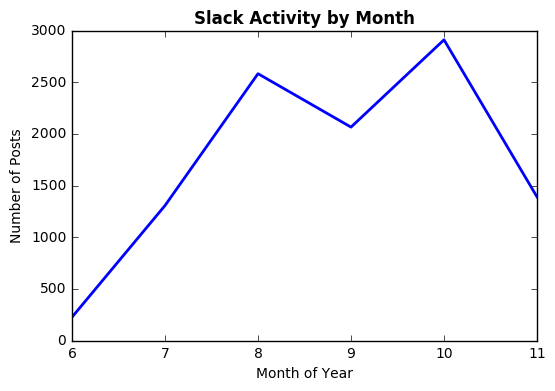

In [369]:
ax = data.groupby(data['datetime'].apply(lambda x: x.month))['text'].size().plot(linewidth = 2);
ax.set_title('Slack Activity by Month', weight = 'bold');
ax.set_xlabel('Month of Year');
ax.set_ylabel('Number of Posts');

If appears that we were initially quite shy chatting on public forums, but later on became more active. Note that June is not a full month, but rather a few days. Now, how are the length of posts changing over time? To do this, we'll create a new feature: word count

In [337]:
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))

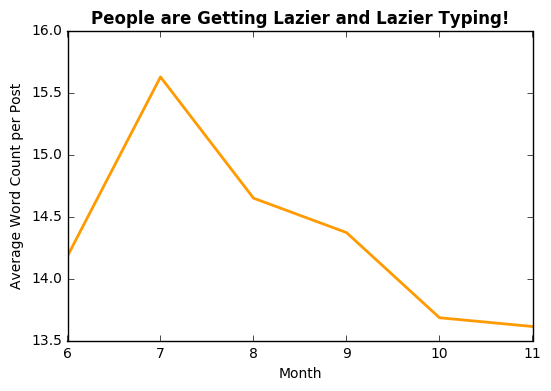

In [458]:
ax = data.groupby(data['datetime'].apply(lambda x: x.month))['word_count'].mean().plot(color = '#ff9a00', linewidth = 2);
ax.set_title('People are Getting Lazier and Lazier Typing!', weight = 'bold');
ax.set_xlabel('Month');
ax.set_ylabel('Average Word Count per Post');

*Interestingly*, people are **posting shorter and shorter** posts, probably with a lot of "Thanks", "Yeah", etc. This reflects that people are becoming more comfortable with each other, and are tearing down more formalities. Let's see what some of these shorter posts look like.

In [355]:
data[data['word_count'] < 3]['text']

14                                           :smiling_imp:
16                                                :scream:
18                                :rage::rage::rage::rage:
31                                           PLEASEEEEEEEE
41                                           Yes, exactly!
50                                           Haha awesome 
72       <https://technet.microsoft.com/en-us/library/c...
76                                            Cool--thanks
90                                   <@U2R2NANUC>: Thanks!
91                                    <@U2R2NANUC> Thanks!
92                                   <@U2R2NANUC>: Thanks!
126                                                will do
127                                                Thanks!
161                                               Me too! 
168                                                   Me! 
205                                                    OMG
207                                            :joy: :jo

Lots of *Thanks*, *lol*, but also hashtags and links. The text surrounded by colons are emojis people used in the text. Later on, we will do an analysis of emojis in the text. For now, let's move on with our look at the data by time. This time, we will look at post counts and reaction counts by the **week**, instead of by the month. 

### <a id="By Week"></a> ..By Week

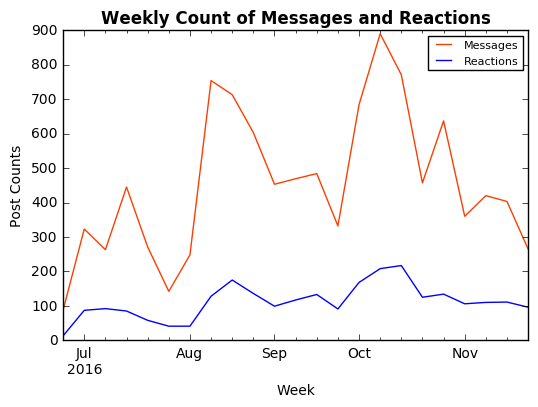

In [464]:
# Map the recorded time to Week 1 - Week 52
numeric_week = lambda d: d.isocalendar()[1]
data['numeric_week'] = data['datetime'].apply(numeric_week)

# Week_start places all dates of that week to Sunday of that week - did this just for grouping
data['week_start'] = data['numeric_week'].apply(lambda x: datetime.strptime("2016-"+str(x)+'-0', "%Y-%W-%w"))

grouped = data.groupby('week_start').count()
ax = grouped['text'].plot(label = 'Messages', color = '#fb3f00')
ax = grouped['reactions'].plot(label = 'Reactions')  #secondary_y = True, label = 'Reactions')

ax.set_ylabel('Post Counts')
ax.set_xlabel('Week')
ax.legend(['Messages', 'Reactions'], loc = 'best', prop = {'size': 8})
ax.set_title('Weekly Count of Messages and Reactions', weight = 'bold')

plt.show()

So clearly, there are more patterns now. First, there is good correlation between message counts and reactions counts - mo' posts, mo' reactions! Second, we see two incredible spikes, one around the 2nd week of August, and another around the 3rd week of October. Where are these peaks coming from? 

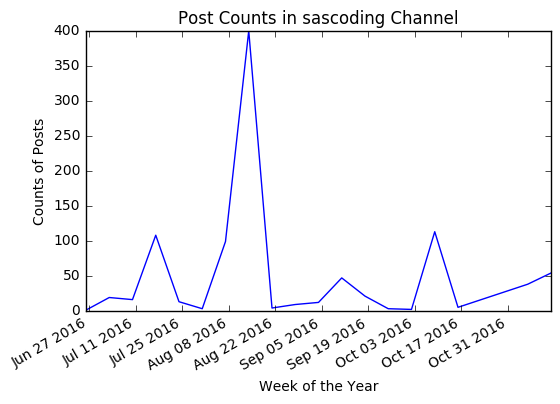

In [465]:
sascoding = data[data['channel'] == 'sascoding']
ax = sascoding.groupby('week_start')['text'].count().plot(color = 'blue');

ax.set_ylabel('Counts of Posts');
ax.set_xlabel('Week of the Year');
ax.set_title('Post Counts in sascoding Channel');

Looking at the 'sascoding' channel, we see there was a huge spike around the two times I mentioned earlier - these were weeks when we had SAS certification exams and there were an incredible number of question asking posts on the 'sascoding' channel. Now, what's funny is that there is an inverse correlation between posts in 'sascoding' and 'social'. I'll illustrate this point below. 

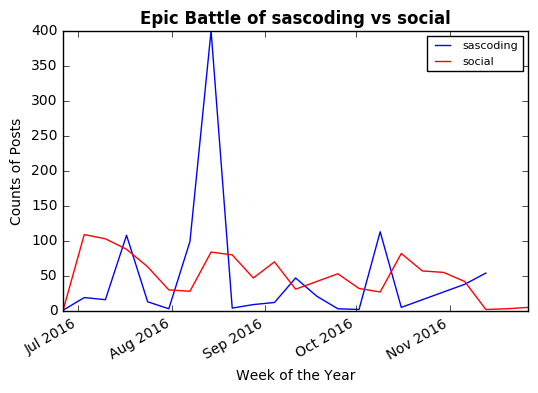

In [466]:
social = data[data['channel'] == 'social']

ax = sascoding.groupby('week_start')['text'].count().plot(color = 'blue');
ax = social.groupby('week_start')['text'].count().plot(color = 'red');

ax.set_xlabel('Week of the Year');
ax.set_ylabel('Counts of Posts');
ax.set_title('Epic Battle of sascoding vs social', weight = 'bold');

ax.legend(['sascoding', 'social'], loc = 'best', prop = {'size': 8});

Do you notice a trend? Whenever sascoding spikes up, social tends to go down. Another way to look at this is that there is a lag of social relative to sascoding. The spikes of social come a few moments after spikes of sascoding. What does this mean? Our MSA class studies hard, but then parties hard!

### <a id="Weekday vs Weekend"></a>..Weekday vs Weekend

In this section, we will do some question answering.. What day of the week has the most activity? Is there a difference in weekend vs weekday? Also, what time do people post posts? First, we must create another variable defining the day of the week. 

In [571]:
# This is a mapping of Monday to 0, Sunday to 6 
data['dayofweek'] = data['datetime'].dt.weekday

Perhaps the most revealing difference in weekday vs weekend was the hour in which activity occurs. Let us graph this out to visually see the results.

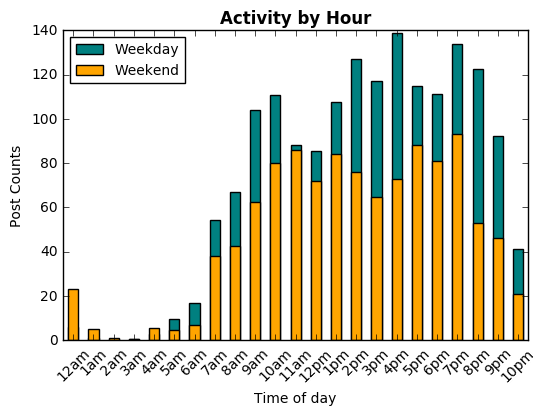

In [572]:
weekend = data[data['dayofweek'] >= 5] # 5, 6 are Saturday, Sunday
weekday = data[data['dayofweek'] < 5]

weekday_average = weekday.groupby(weekday['datetime'].dt.hour)['text'].count()/5
ax = weekday_average.plot(kind = 'bar', color = 'teal')

weekend_average = weekend.groupby(weekend['datetime'].dt.hour)['text'].count()/2
ax = weekend_average.plot(kind = 'bar', color = 'orange')

ax.set_title('Activity by Hour', weight = 'bold')
ax.set_xlabel('Time of day')
ax.set_ylabel('Post Counts')

# We will format the tick marks on the xaxis to reflect time
hour_labels = []
for i in xrange(0, 24):
    if i == 0:
        hour = "12am"
    elif 0 < i < 12:
        hour = "{}am".format(i)
    elif i == 12: 
        hour = "12pm"
    else:
        hour = "{}pm".format(i-12)
    hour_labels.append(hour)
    
ax.set_xticklabels(hour_labels, rotation = 45);
ax.legend(['Weekday', 'Weekend'], loc = 'best', prop = {'size': 10});

Slack activity is more vibrant in the Weekday than it is on the Weekend. People are up much later on the weekends though, as activity at 12am - 4am trumps weekday activity. Wow, who knew the brainy MSA class were such heavy party-ers! Talk about work hard play hard! But in general, people are still snoozing from 11pm (no activity!) to 6am. 

Another interesting trend is that the activity has peaks and valleys around certain events. 12pm-1pm is a valley - In the hour of lunch break between classes, we keep our hands busy on food rather than on the keyboard/phone. Then, class resumes and as the hour goes by people are paying more attention, so slack activity declines. Class dismisses at 4pm, and people get chatty again, before dipping between 6-7pm, when we presumably have dinner. 

*Are there certain days of the week people are more inclined to post over others?*

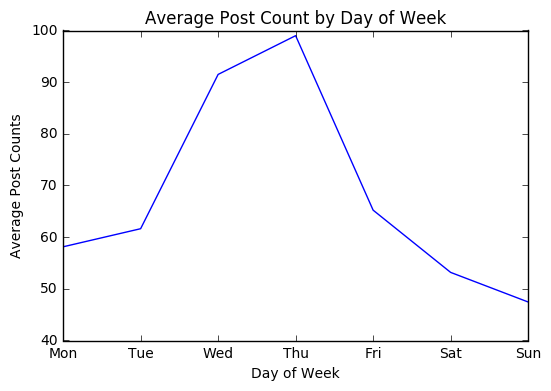

In [516]:
number_of_weeks = max(data['numeric_week']) - min(data['numeric_week'])

grouped = data.groupby('dayofweek')['text'].count() / number_of_weeks;

ax = grouped.plot()
ax.set_xlabel('Day of Week');
ax.set_ylabel('Average Post Counts');
ax.set_title('Average Post Count by Day of Week');

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax.set_xticklabels(days);

Apparently, people don't post much on Saturday - Tuesday compared to Wednesday and Thursday. What if we break this result down by different channels? Will we see some interesting trends?

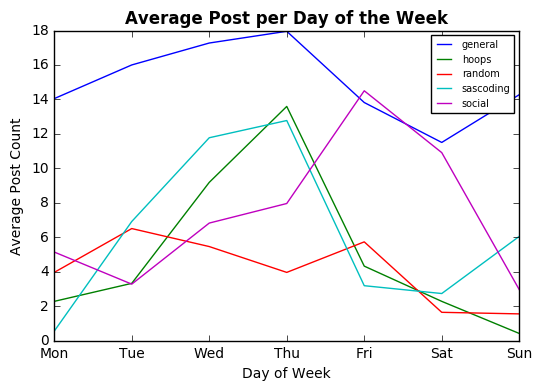

In [535]:
# Function returning grouping of Texts by channel, given input of channel name
def channel_posts(channel):
    return data[data['channel'] == channel].groupby('dayofweek')['text'].count()/number_of_weeks


channels = [] # Collect list of channels
for channel in data['channel'].unique(): 
    
    # take only channels with more than 600 posts 
    if len(data[data['channel'] == channel]) > 600: 
        channels.append(channel)
        ax = channel_posts(channel).plot()

ax.legend(channels, loc = 'best', prop = {'size': 7});
ax.set_title('Average Post per Day of the Week', weight = 'bold')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Post Count')
ax.set_xticklabels(days);

The trend of posts increasing from Monday to Thursday before steeply dropping off afterward, is quite consistent for most 'major' channels (channels with more than 600 posts).  The *social* channel though, was an exception: it peaked on Friday, and it was the only channel where Saturday is higher than any other day of the week other than Friday. This confirms the obvious intuition that people are more inclined to seek social activities on the weekends.

That wraps up our exploratory analysis. There are much more digging we can do by users, by channel types, etc, but I thought the time trends were most interesting. And if you've made this far, clearly you are enjoying what you are reading! If you are interested, please feel free to check out further analysis done on the MSA Slack data. If not, thanks for reading, and enjoy your day!

* **Part 1: [Exploratory Analysis]**

* Part 2: [Discovering Channel Keywords](http://localhost:8888/notebooks/Portfolio/Text%20Mining%20on%20Slack%20App/)

* Part 3: [Channel Clustering]()

* Part 4: [Sentiment Analysis]()